In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch
from torch.utils.data import DataLoader, Dataset
from utils import *

In [2]:
import os
from sklearn.model_selection import train_test_split

sheet = 5
window_size = 60
k = 3
fs = 0.2
cut_f = 0.05

df_names = os.listdir('Dataset')
df_names = [filename for filename in df_names if filename.endswith('.xlsx')]
df = None

for i in range(len(df_names)):
    tmp = read_data("Dataset/"+df_names[i], sheet)
    tmp = remove_basic_background(tmp)
    # tmp,_ = extract_df_in_temp(tmp, list(range(32,37)))
    # tmp,_ = extract_df_in_temp(tmp, 37)
    # tmp = remove_background(tmp, window_size, 0.01)
    tmp.iloc[:,2:62] = savgol_filter(tmp.iloc[:,2:62].values, window_size, k, axis=0)
    # tmp.iloc[:,2:62] = butter_filter(tmp.iloc[:,2:62].values, cut_f, fs, 6)
    if df is None:
        df = tmp
    else:
        df = pd.concat([df, tmp])
df

,Unnamed: 0,Unnamed: 1,1050,1219,1314,1409,1550,1609,1050.1,1219.1,...,1409.8,1550.8,1609.8,1050.9,1219.9,1314.9,1409.9,1550.9,1609.9,TC1实际温度
0,45451.633092,1,-0.000883,-0.000611,-0.000430,-0.002291,0.000632,0.000465,0.000004,0.001755,...,-0.007220,0.003214,0.000537,-0.004240,-0.004004,-0.004661,-0.005972,-0.002174,-0.002656,31.29
1,45451.633158,2,-0.001113,-0.000699,-0.000588,-0.002450,0.000437,0.000299,-0.000546,0.001600,...,-0.007312,0.002986,0.000307,-0.004468,-0.003976,-0.004694,-0.005967,-0.002315,-0.002700,31.30
2,45451.633222,3,-0.001330,-0.000783,-0.000739,-0.002602,0.000250,0.000144,-0.001067,0.001451,...,-0.007399,0.002775,0.000091,-0.004682,-0.003950,-0.004726,-0.005961,-0.002444,-0.002741,31.30
3,45451.633286,4,-0.001535,-0.000864,-0.000884,-0.002747,0.000071,-0.000002,-0.001560,0.001306,...,-0.007482,0.002581,-0.000113,-0.004883,-0.003926,-0.004756,-0.005955,-0.002559,-0.002781,31.30
4,45451.633351,5,-0.001729,-0.000942,-0.001022,-0.002884,-0.000101,-0.000138,-0.002024,0.001166,...,-0.007561,0.002403,-0.000304,-0.005070,-0.003904,-0.004786,-0.005950,-0.002661,-0.002819,31.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,45452.952134,1230,0.023172,0.009921,0.012109,0.018541,0.004583,0.006052,0.054876,0.017883,...,0.050889,0.002077,0.010316,0.034660,0.014335,0.018054,0.026302,0.004984,0.008116,37.00
1230,45452.952200,1231,0.023339,0.010054,0.012221,0.018640,0.004765,0.006095,0.055218,0.018148,...,0.050868,0.002242,0.010340,0.034786,0.014376,0.018121,0.026286,0.005072,0.008097,37.00
1231,45452.952265,1232,0.023526,0.010206,0.012348,0.018752,0.004965,0.006141,0.055600,0.018450,...,0.050843,0.002417,0.010364,0.034925,0.014421,0.018194,0.026268,0.005166,0.008076,37.00
1232,45452.952332,1233,0.023733,0.010377,0.012489,0.018878,0.005186,0.006192,0.056023,0.018792,...,0.050813,0.002604,0.010388,0.035076,0.014471,0.018273,0.026248,0.005264,0.008051,37.00


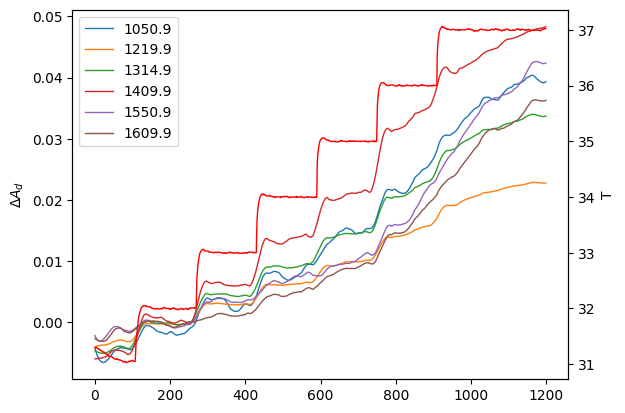

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from utils import create_dataset

""" Savgol filter """
# df = savgol_filt(df)
train_df, test_df = train_test_split(df, test_size=0.7, random_state=42)

""" Data columns """
# circle = ['34','45']
# columns = list(range(44,50)) + list(range(56,62))
circle = ['45']
columns = list(range(56, 62))
wavelength = df.columns[columns]

""" Data scale """
# x_scaler = StandardScaler()
x_scaler = None
# y_scaler = StandardScaler()
y_scaler = None

dataset = create_dataset(train_df, test_df, columns, x_scaler, y_scaler)
dataset['train_input'].shape, dataset['train_label'].shape
plot_df(df, list(range(0, 1200)), columns)

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.19e-02 | test_loss: 9.42e-02 | reg: 3.01e+00 | : 100%|█| 100/100 [00:19<00:00,  5.25

saving model version 0.1


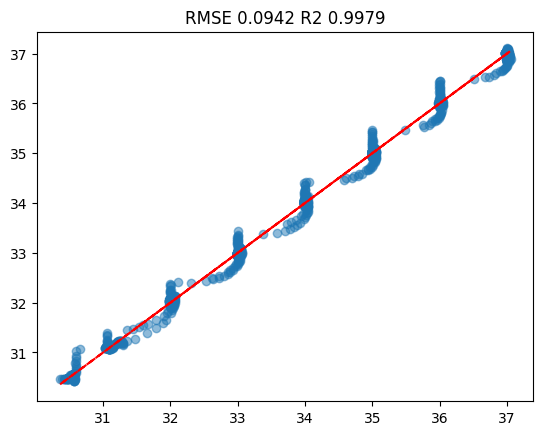

In [4]:
from kan import *
model = KAN(width=[len(columns), [0, 1]], mult_arity=2, grid=3, k=3, seed=10, base_fun='identity')
model(dataset['train_input']);
model.fit(dataset=dataset, opt="LBFGS", steps=100, lamb=0.002);
test_model(model, dataset, y_scaler)

tensor([0.1170, 0.0661, 0.9268, 0.3206, 0.1167, 1.1385])

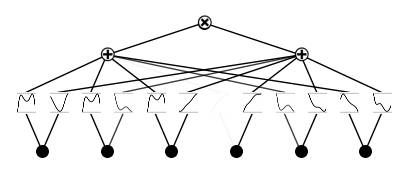

In [5]:
model.plot(beta=100)
model.feature_score

RMSE 0.1832 R2 0.9891


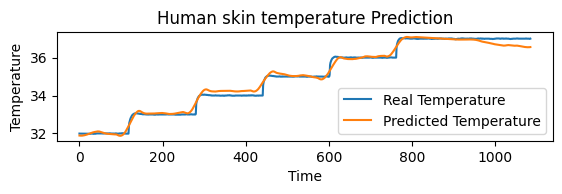

RMSE 0.4467 R2 0.9503


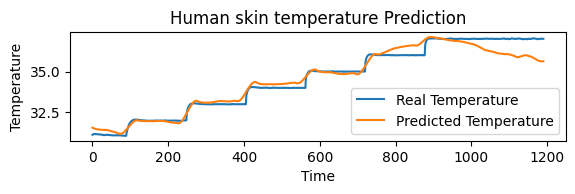

RMSE 0.4200 R2 0.9537


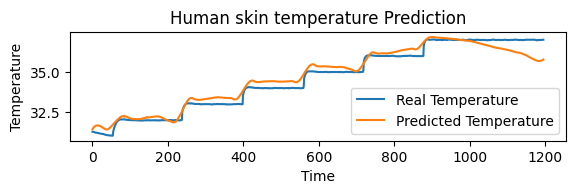

In [6]:
def test_time_series(model, test_dir, sheet, columns, x_scaler=None, y_scaler=None, window_size=60, k=3):
    df_names = os.listdir(test_dir)
    df_names = [filename for filename in df_names if filename.endswith('.xlsx')]

    i = 1
    # plt.figure(figsize=(6,6))
    for name in df_names:
        test_df = read_data(test_dir + name, sheet)
        test_df = remove_basic_background(test_df)
        # test_df,_ = extract_df_in_temp(test_df, list(range(32,37)))
        test_df.iloc[:, 2:62] = savgol_filter(test_df.iloc[:, 2:62], window_size, k, axis=0)

        X = test_df.iloc[:, columns].values
        y = test_df.iloc[:, 62].values.reshape(-1, 1)
        try:
            y_pred = model(torch.tensor(X).float()).detach().numpy().reshape(-1, 1)
        except:
            y_pred = model(X).reshape(-1, 1)

        if x_scaler is not None:
            X = x_scaler.transform(test_df.iloc[:, columns].values)
        if y_scaler is not None:
            y_pred = y_scaler.inverse_transform(y_pred)

        rmse = np.sqrt(np.mean((y - y_pred)**2))
        r2 = r2_score(y, y_pred)
        print("RMSE {:.4f} R2 {:.4f}".format(rmse, r2))
        
        plt.subplot(len(df_names), 1, i)
        # plot_df(test_df, list(range(len(test_df))), columns)
        # plt.subplot(2, len(df_names), i+1)
        plot_predictions(y, y_pred)
        i = i + 1
    plt.show()


test_time_series(model, 'Testset/', sheet, columns, window_size=window_size, k=k)

saving model version 0.2


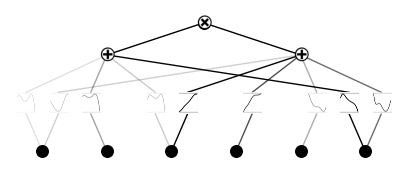

In [7]:
model = model.prune()
model.plot()

In [8]:
mode = "auto"  # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x', 'x^2', 'x^3','x^0.5', 'tanh']
    # lib = None
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.2644890248775482, c=1
fixing (0,0,1) with x, r2=0.48962268233299255, c=1
fixing (0,1,0) with x, r2=0.4176880121231079, c=1
fixing (0,1,1) with 0
fixing (0,2,0) with x, r2=0.32670819759368896, c=1
fixing (0,2,1) with x, r2=0.9939529299736023, c=1
fixing (0,3,0) with 0
fixing (0,3,1) with x, r2=0.9006187915802002, c=1
fixing (0,4,0) with 0
fixing (0,4,1) with x, r2=0.836714506149292, c=1
fixing (0,5,0) with x, r2=0.9222248792648315, c=1
fixing (0,5,1) with x, r2=0.36195439100265503, c=1
saving model version 0.3


| train_loss: 1.56e-01 | test_loss: 1.66e-01 | reg: 2.82e+00 | : 100%|█| 100/100 [00:07<00:00, 12.93


saving model version 0.4


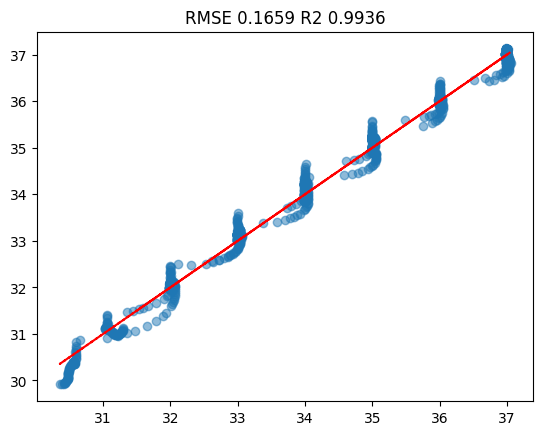

In [9]:
model.fit(dataset, opt="LBFGS", steps=100, lamb=0.001);
# model.fit(dataset, opt="LBFGS", steps=100, lamb=0.01, lamb_l1=0., lamb_entropy=0., lamb_coef=2.0);
test_model(model, dataset, y_scaler)

(2031*x_1/1000 - 1937*x_2/500 - 687*x_3/500 - 21479*x_6/1000 + 1719/125)*(3103*x_1/1000 + 17873*x_3/1000 - 376*x_4/719 - 123*x_5/166 - 4*x_6 + 1167/500)

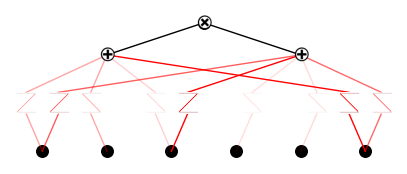

In [10]:
model.get_act(dataset)
model.plot()
sf = model.symbolic_formula()[0][0]
nsimplify(ex_round(ex_round(sf, 3),3))

RMSE 0.1235 R2 0.9950


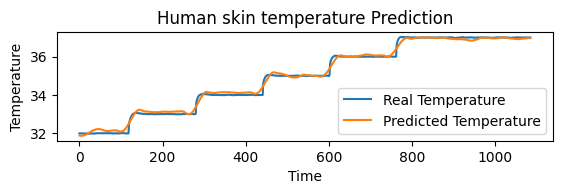

RMSE 0.1323 R2 0.9956


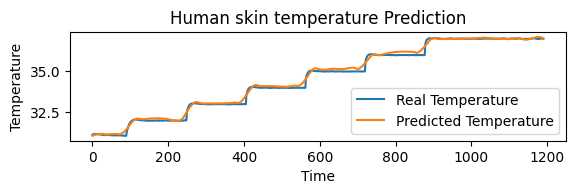

RMSE 0.2077 R2 0.9887


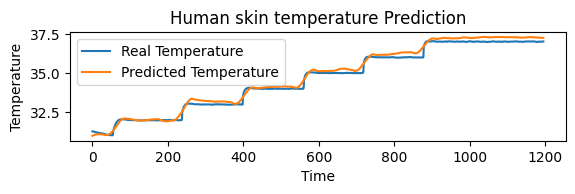

In [11]:
test_time_series(model, 'Testset/', sheet, columns, window_size=window_size, k=k)